Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [22]:
runs = ['attention_none', 'attention_gates', 'attention_bottleneck', 'attention_gates_bottleneck']

### Epoch analyis

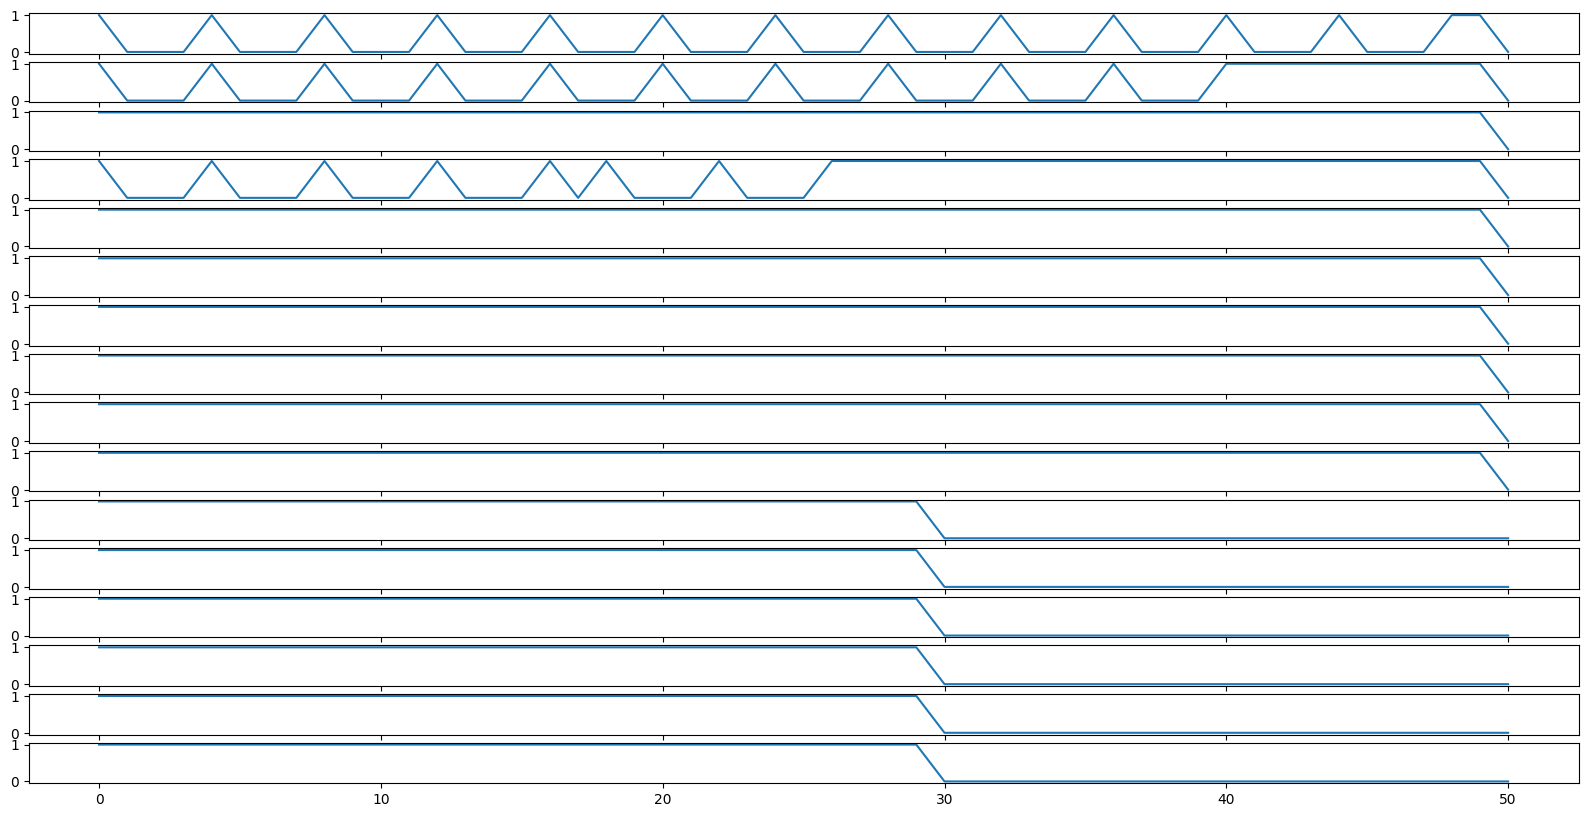

In [21]:
_, axs = plt.subplots(4*4, 1, figsize=(20, 10), sharex=True)
ax_id = 0
for run in runs:
    for fold in range(4):
        epoch_exists = pd.Series([0]*51)
        for epoch in range(50):
            if os.path.isfile(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/test_preds_epoch_{epoch}.csv'):
                epoch_exists[epoch] = 1
        epoch_exists.plot(ax=axs[ax_id])
        ax_id += 1

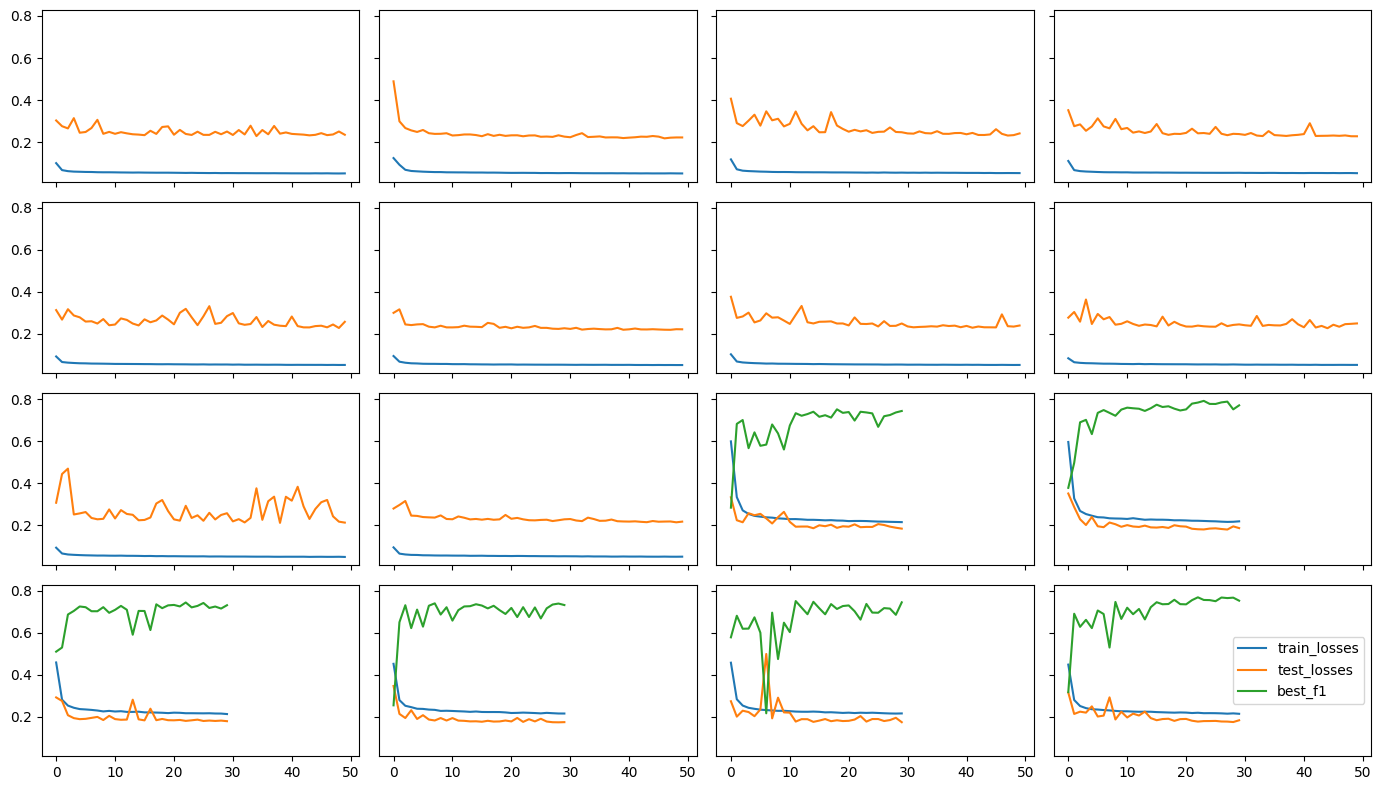

In [33]:
_, axs = plt.subplots(4, 4, figsize=(14, 8), sharex=True, sharey=True)
for row, run in enumerate(runs):
    for col, fold in enumerate(range(4)):
        pd.read_csv(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/losses.csv').plot(ax=axs[row, col], legend=row+col==6)
plt.tight_layout()

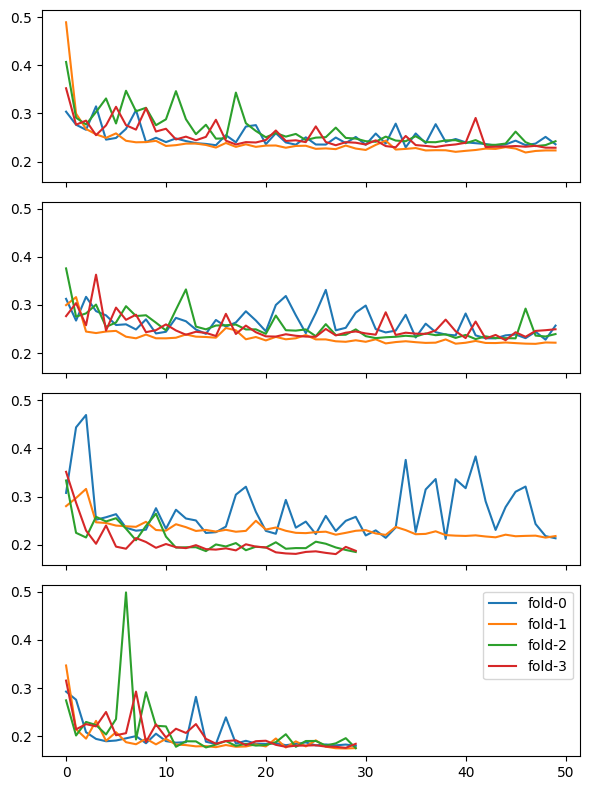

In [37]:
_, axs = plt.subplots(4, 1, figsize=(6, 8), sharex=True, sharey=True)
for row, run in enumerate(runs):
    run_losses = {}
    for col, fold in enumerate(range(4)):
        run_losses[f'fold-{fold}'] = pd.read_csv(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/losses.csv')['test_losses']
    pd.DataFrame(run_losses).plot(ax=axs[row], legend=row==3)
plt.tight_layout()

### Results

In [38]:
data = pd.read_csv('45_results_with_folds.csv')

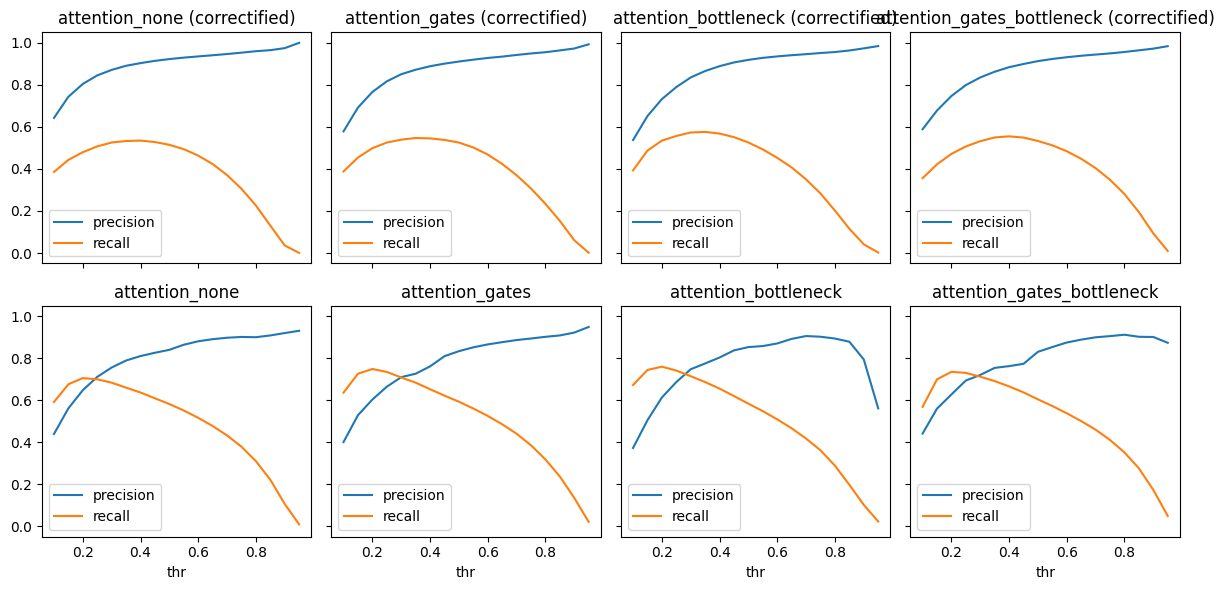

In [39]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'precision', 'recall']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

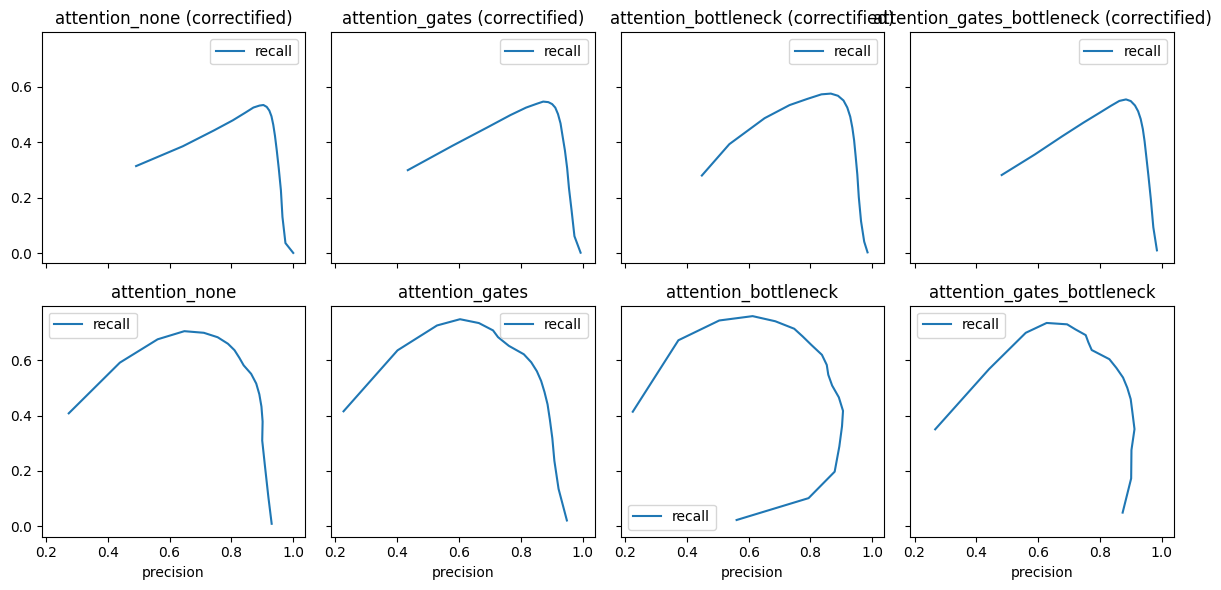

In [40]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['precision', 'recall']].set_index('precision').plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

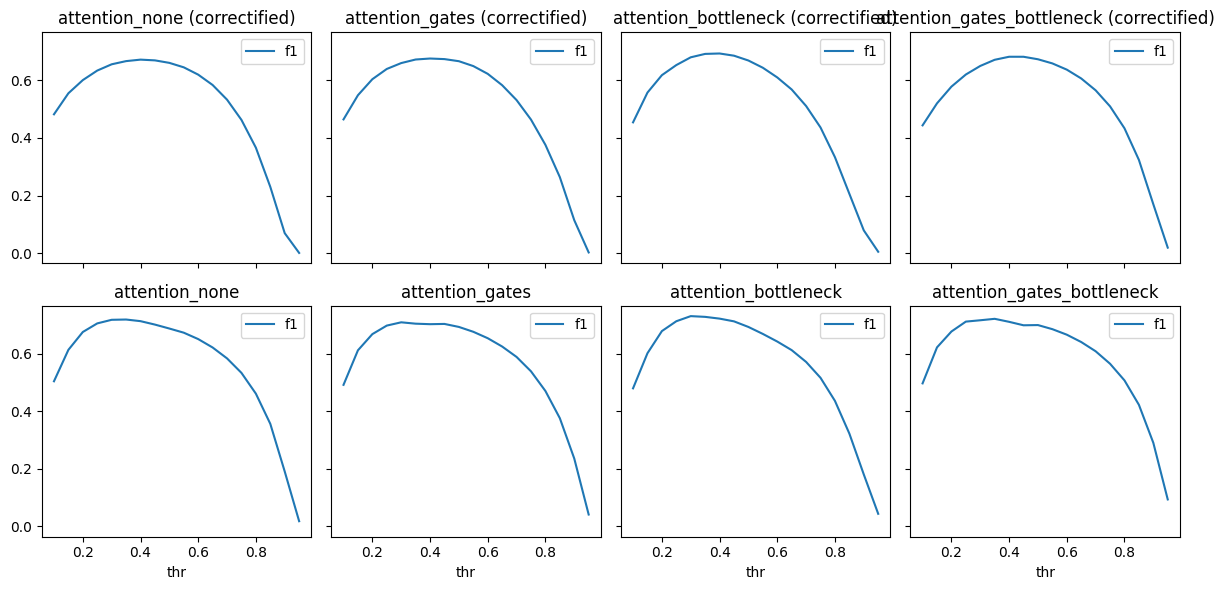

In [41]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

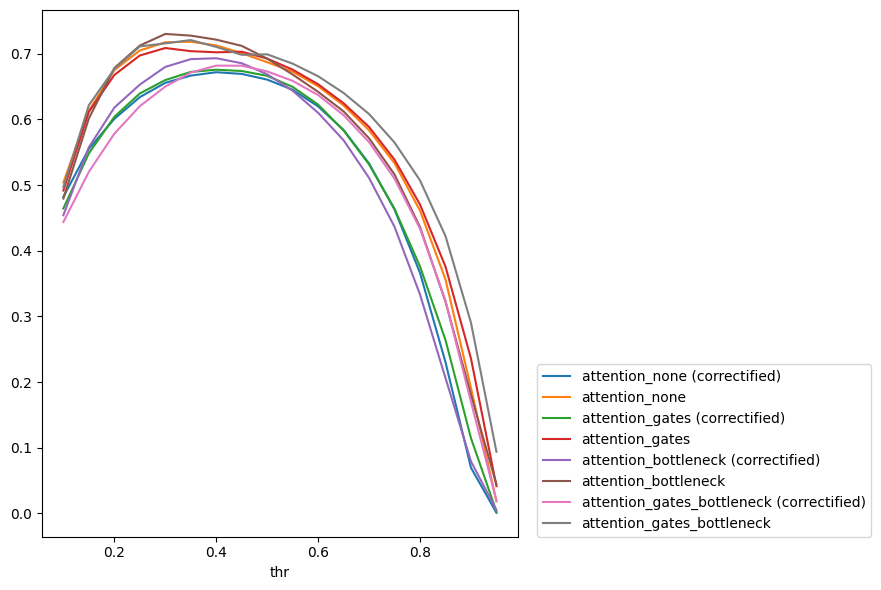

In [42]:
_, axs = plt.subplots(1, 1, figsize=(9, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{run}{' (correctified)' if correctify else ''}']
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

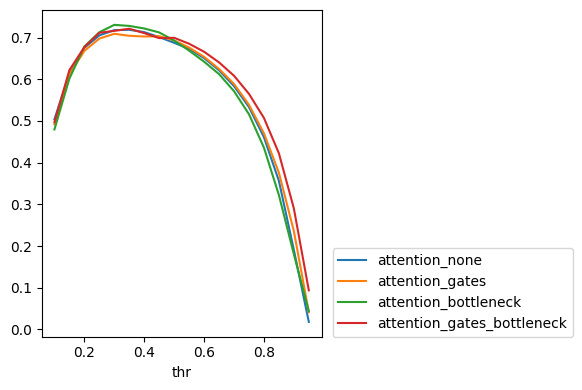

In [45]:
_, axs = plt.subplots(1, 1, figsize=(6, 4), sharex=True, sharey=True)
for col, run in enumerate(runs):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == False)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [run]
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

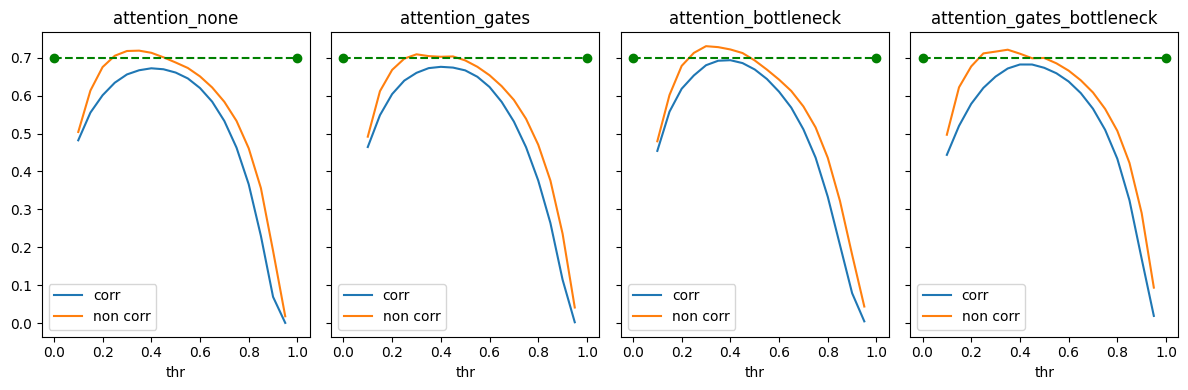

In [43]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 4), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.7]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()